In [417]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# Construction Direction

In [418]:
df = pd.read_csv('./weight-height.csv')
df.shape

(10000, 3)

In [419]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [420]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


## Population

Our population is of size N=10000, and we are interested in the **Height** feature.

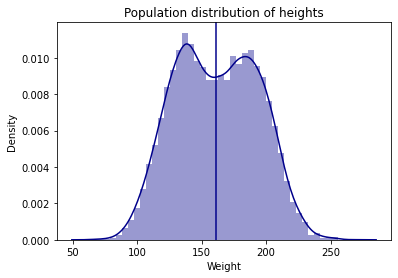

In [421]:
sns.distplot(df.Weight,color='darkblue').set_title('Population distribution of heights')
plt.axvline(fmean(df.Weight),color='darkblue')

## Random Sampling

* We choose our random sample size to be n=100
* We draw 10 samples of size n 
* Our 10 samples have the same size and even have a fraction of the same elements just by coincendence, but they have at least a number p of observation that makes them different and we can see that through the distributions of samples

In [519]:
import random
random.seed(31953)
n = 30 
nsamples = 100000
samples = []
for i in range(nsamples):
    samples.append(random.sample(list(df.Weight),n))

In [520]:
test = pd.DataFrame(samples).T
test.columns,test.shape

(RangeIndex(start=0, stop=100000, step=1), (30, 100000))

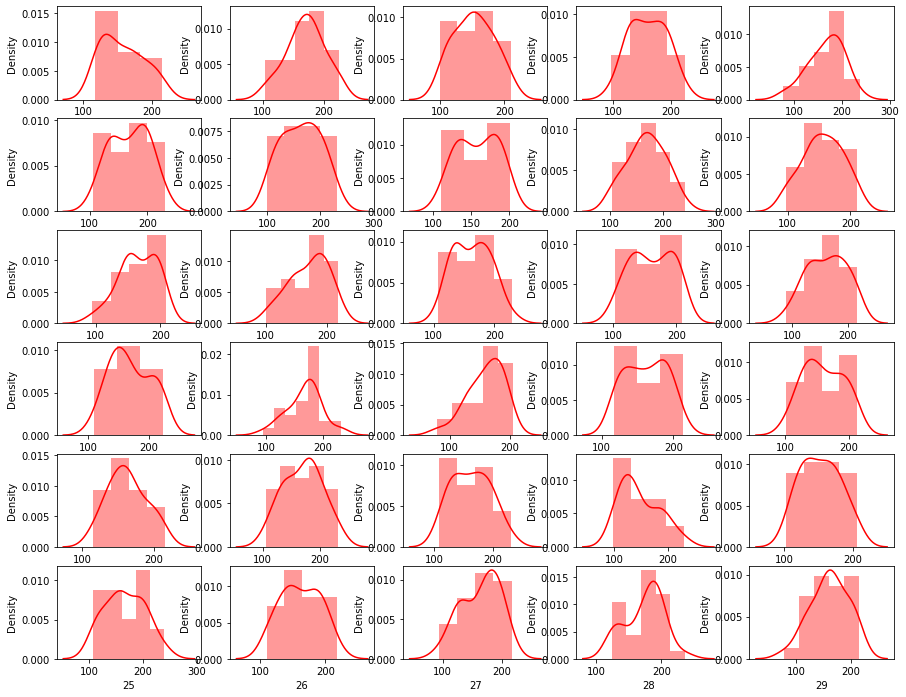

In [528]:
fig,axes = plt.subplots(6,5,figsize=(15,12))
for i in range(30):
    ax = axes[i//5,i%5]
    sns.distplot(test[i],ax=ax,color='red')

In [522]:
sampling = [fmean(sample) for sample in samples] 

In [523]:
mu = df.Weight.mean()
xbar = fmean(sampling)
d = np.abs(mu - xbar)
print('μ=%.2f x̄=%.2f d=%.2f' % (mu,xbar,d))

μ=161.44 x̄=161.43 d=0.01


,count,mean,std,min,25%,50%,75%,max
0,100000.0,161.433799,5.850194,138.420998,157.458818,161.415895,165.401614,185.921417


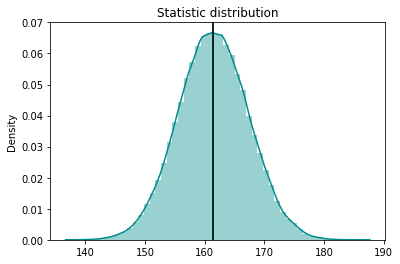

In [531]:
# Sampling (Statistic) distribution
from scipy.stats import norm
sns.distplot(sampling,color='darkcyan').set_title('Statistic distribution')
plt.axvline(xbar,color='darkcyan')
plt.axvline(mu,color='k')
pd.DataFrame(sampling).describe().T

### Result

You can clearly see that the sampling distribution (not the distribution of the sample) is normally distributed even tho the underlying population is not following a normal distribution, this is due to the **Central Limit Theorem** as k->inf (in this case k is 100000 which is a pretty big number of samples drawn from the population) the sampling distribution is a gaussian with a mean=μ (161.433799 ≃ 161.440357) and a standard error (SE=sigma/sqrt(N)) 

In [587]:
# THE SAMPLE that we got
data = pd.DataFrame(samples[29])
data.columns = ['Age']

,count,mean,std,min,25%,50%,75%,max
Age,30.0,160.485873,34.246507,78.60667,138.060708,162.112487,189.773855,213.683943


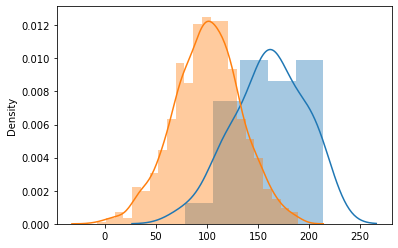

In [588]:
sns.distplot(data)
sns.distplot(n)
data.describe().T

In [593]:
from statsmodels.stats.weightstats import ztest
ztest(data,value=df.Weight.mean())

(array([-0.15265566]), array([0.87866983]))